In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from scipy.optimize import fsolve
from tqdm import trange
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import os
import sys
sys.path.append("../dyn/")
sys.path.append("../")
sys.path.append("../phase/")
sys.path.append("../artfigs_NC/")
from dyn_ultis import *
from spatial_ultis import *
from artfigs_NC_params import *
from artfigs_NC_ultis import *


In [2]:
def generate_params_phase_d_II_g_bar_II_try(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 22500, 5625
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.75, 1.25, -20, -3.5
    d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.1
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0,0,0,0

    d_II_list = np.linspace(0.06, 0.16, trial_num)
    g_bar_II_list = np.linspace(-3, -5, trial_num)

    d_II = d_II_list[trial1]
    g_bar_II = g_bar_II_list[trial2]
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))

    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    
    return p_net 

In [3]:
p_simul = Simul_Params(T = 100, t_step=100, record_step=10, activation_func=['thres_linear','thres_powerlaw'], external_input="DC_noise")
p_net = generate_params_phase_d_II_g_bar_II_try(0, 10)

fixed_points = find_dyn_fix_point(p_net, p_simul)
p_net_eff = calc_eff_p_net(p_net, p_simul)
fixed_points = sorted(fixed_points, key=lambda x: x[0])
print(fixed_points)
temp_plot_pred(p_net_eff)

c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


KeyboardInterrupt: 

In [148]:
if type(p_simul.activation_func) == str:
    activation_func_list = [activation_func_dict[p_simul.activation_func], activation_func_dict[p_simul.activation_func]]
elif type(p_simul.activation_func) == list:
    activation_func_list = [activation_func_dict[p_simul.activation_func[0]], activation_func_dict[p_simul.activation_func[1]]]
external_input = external_input_dict[p_simul.external_input]

def df(x):
    dx_dt = np.array([0.0,0.0])
    dx_dt[0] = -x[0] + p_net.g_bar_EE * activation_func_list[0](x[0]) + p_net.g_bar_EI * p_net.N_I / p_net.N_E * activation_func_list[1](x[1]) + np.mean(external_input(0, p_net)[0][0:p_net.N_E])
    dx_dt[1] = -x[1] + p_net.g_bar_IE * activation_func_list[0](x[0]) * p_net.N_E / p_net.N_I + p_net.g_bar_II * activation_func_list[1](x[1]) + np.mean(external_input(0, p_net)[0][p_net.N_E:p_net.N_E+p_net.N_I])
    return dx_dt

df(fixed_points[0])

array([-4.4408921e-16, -4.4408921e-16])

In [149]:
external_input(0, p_net)

(array([1., 1., 1., ..., 1., 1., 1.]),
 array([ 0.03126783,  0.04213736,  0.08920254, ..., -0.09835902,
        -0.2353504 , -0.00743113], dtype=float32))

In [13]:
def generate_params_phase_d_II_g_bar_II_L(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 40000, 10000
    alpha = 1.0
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.5, 5, -5, -4.25
    d_EE, d_IE, d_EI, d_II = 0.05, 0.05, 0.05, 0.05
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0.1,0.1,0.1,0.1

    d_II_list = np.linspace(0.02,0.1,trial_num)
    d_II = d_II_list[trial1]
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))

    g_bar_II_list = list(np.linspace(-1, -7, trial_num))
    g_bar_II = g_bar_II_list[trial2]

    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    
    return p_net  

  0%|          | 0/11 [00:00<?, ?it/s]c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
100%|██████████| 11/11 [03:12<00:00, 17.47s/it]
f:\spatial-linear-project\code\artfigs_NC\artfigs_NC_ultis.py:67: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, radius_list, levels=[1], colors='gray', linestyles='--')


FileNotFoundError: [Errno 2] No such file or directory: './figs/artfigs_NC_try_phase.png'

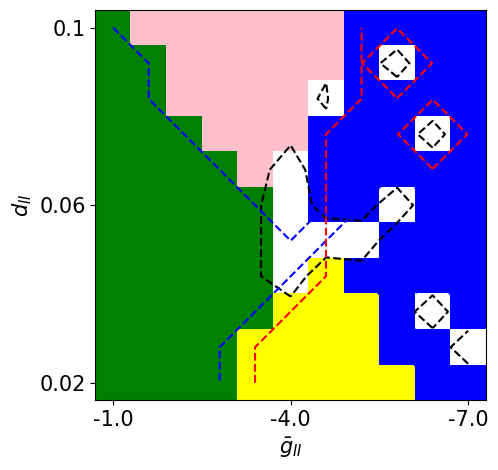

In [14]:
changed_params = ['d_II', 'g_bar_II']
changed_params_latex = [r'$d_{II}$', r'$\bar{g}_{II}$']
p_simul = Simul_Params(T = 100, t_step=100, record_step=10, activation_func=['tanh','linear'], external_input="noise")
plot_phase_diagram_new("try", changed_params, changed_params_latex, generate_params_phase_d_II_g_bar_II_L, p_simul, repeat_num=5)

[array([-1.7074274 , -2.75391516]),
 array([0., 0.]),
 array([1.7074274 , 2.75391516])]

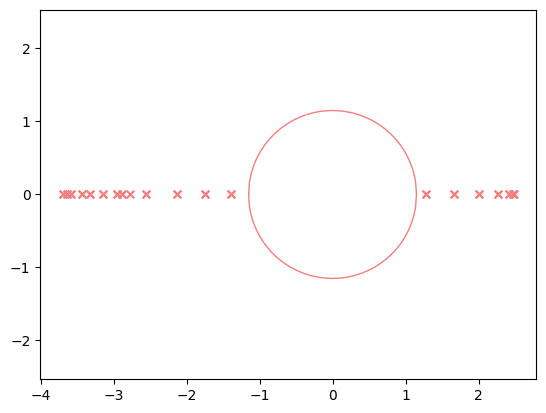

In [7]:
p_net = generate_params_phase_d_II_g_bar_II_L(1,8,11)
p_simul = Simul_Params(T = 100, t_step=100, record_step=10, activation_func=['tanh','linear'], external_input="noise")
p_net_eff = calc_eff_p_net(p_net, p_simul)
temp_plot_pred(p_net_eff)
fixed_points = find_dyn_fix_point(p_net, p_simul)
fixed_points = sorted(fixed_points, key=lambda x: x[0])
fixed_points

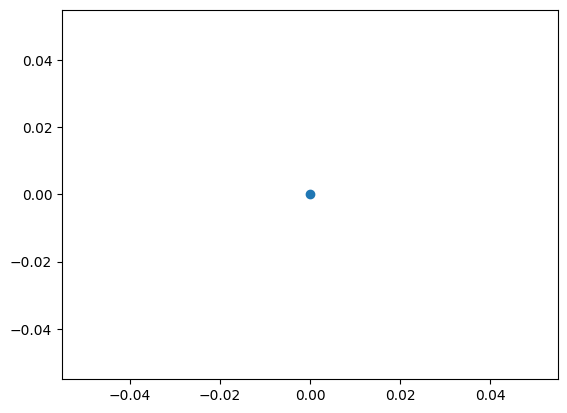

In [ ]:
fixed_points = np.array(fixed_points)
plt.scatter(fixed_points[:,0], fixed_points[:,1])

In [ ]:
p_net = generate_params_phase_d_II_g_bar_II_try(0, 10)
record_x = dyn_simul(p_net, p_simul, dim=2, homo_fix_point=True)

100%|██████████| 10000/10000 [05:55<00:00, 28.10it/s]


In [ ]:
record_x_save = record_x.copy()

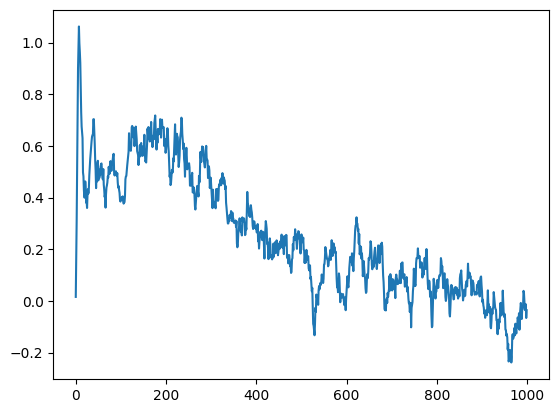

In [ ]:
plt.plot(record_x[:,100])

In [ ]:
record_x = np.pad(record_x[:,0:p_net.N_E], ((0,0),(0,int(np.ceil(np.sqrt(p_net.N_E))**2 - p_net.N_E))))
record_x_img = record_x.reshape(np.shape(record_x)[0],int(np.ceil(np.sqrt(p_net.N_E))), int(np.ceil(np.sqrt(p_net.N_E))))

frames = []
scale_max = np.max(record_x)
for step in trange(np.shape(record_x)[0]):
    fig, ax = plt.subplots()
    
    norm = mcolors.TwoSlopeNorm(vmin=-scale_max, vcenter=0, vmax=scale_max)
        #img = ax.imshow(record_x[step][0:int(np.ceil(np.sqrt(p_net.N_E)))**2].reshape((int(np.ceil(np.sqrt(p_net.N_E))), int(np.ceil(np.sqrt(p_net.N_E))))), cmap=plt.cm.RdBu, norm=norm, origin='upper', aspect=1)
    img = ax.imshow(record_x_img[step,:,:], cmap=plt.cm.RdBu, norm=norm, origin='upper', aspect=1)

    ax.set_xlabel("Location", fontsize=15)
    ax.set_ylabel("Location", fontsize=15)
    # 设置 x 和 y 轴的刻度
    ticks = [0, int(np.ceil(np.sqrt(p_net.N_E)))]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    # 设置 x 和 y 轴的刻度标签
    ax.set_xticklabels([0, 1])
    ax.set_yticklabels([0, 1])
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    cb = fig.colorbar(img, ax=ax, extend='both')
    cb.locator = MaxNLocator(nbins=5)
    cb.update_ticks()
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave("../../figs/bump_nonliear.gif", frames, duration=0.05)

100%|██████████| 1000/1000 [01:08<00:00, 14.64it/s]


In [ ]:
def generate_params_phase_d_II_g_bar_II_S(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 6400, 1600
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 50.0, 50.0/4, -50.0*4, -40.0
    d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.1
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0,0,0,0

    # d_II_list = np.linspace(0.02,0.1,trial_num)*4
    # d_II = d_II_list[trial1]
    # conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))

    # g_bar_II_list = list(np.linspace(-10, -55, trial_num))
    # g_bar_II = g_bar_II_list[trial2]

    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    
    return p_net 

[array([-2.18125662, -0.57483632])]


c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


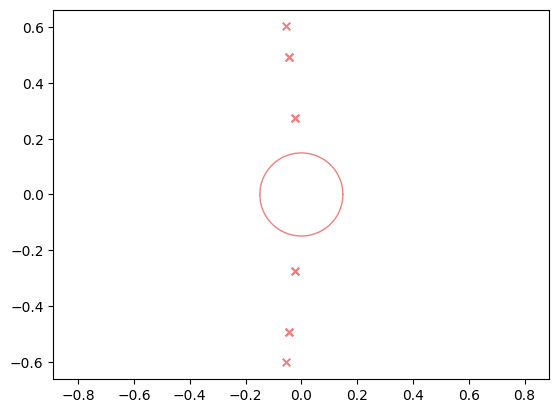

In [ ]:
p_simul = Simul_Params(T = 100, t_step=100, record_step=10, activation_func=['shifted_sigmoid','shifted_sigmoid'], external_input="noise")
p_net = generate_params_phase_d_II_g_bar_II_S(5, 5)
if type(p_simul.activation_func) == str:
    activation_func_list = [activation_func_dict[p_simul.activation_func], activation_func_dict[p_simul.activation_func]]
elif type(p_simul.activation_func) == list:
    activation_func_list = [activation_func_dict[p_simul.activation_func[0]], activation_func_dict[p_simul.activation_func[1]]]

fixed_points = find_dyn_fix_point(p_net, p_simul)
p_net_eff = calc_eff_p_net(p_net, p_simul)
fixed_points = sorted(fixed_points, key=lambda x: x[0])
print(fixed_points)
fixed_point = fixed_points[0]

eps = 1e-4
d_phi_list = [0.0, 0.0]
d_phi_list[0] = (activation_func_list[0](fixed_point[0] + eps) - activation_func_list[0](fixed_point[0] - eps))/(2 * eps)
d_phi_list[1] = (activation_func_list[1](fixed_point[1] + eps) - activation_func_list[1](fixed_point[1] - eps))/(2 * eps)

p_net_eff = Network_Params(N_E = p_net.N_E, N_I = p_net.N_I,
    N_EE = p_net.N_EE, N_IE = p_net.N_IE, N_EI = p_net.N_EI, N_II = p_net.N_II,
    d_EE = p_net.d_EE, d_IE = p_net.d_IE, d_EI = p_net.d_EI, d_II = p_net.d_II,
    g_bar_EE = p_net.g_bar_EE * d_phi_list[0], g_bar_EI = p_net.g_bar_EI * d_phi_list[1], g_bar_IE = p_net.g_bar_IE * d_phi_list[0], g_bar_II = p_net.g_bar_II * d_phi_list[1],
    g_EE = p_net.g_EE * d_phi_list[0], g_EI = p_net.g_EI * d_phi_list[1], g_IE = p_net.g_IE * d_phi_list[0], g_II = p_net.g_II * d_phi_list[1])

temp_plot_pred(p_net_eff)

In [2]:
def generate_params_phase_d_II_g_bar_II_try_L(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 40000, 10000
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 0.575, 0.125, -1.9, -0.34
    d_EE, d_IE, d_EI, d_II = 0.04, 0.04, 0.04, 0.04
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0,0,0,0

    d_II_list = np.linspace(0.06, 0.16, trial_num) * 0.4
    g_bar_II_list = np.linspace(-0.3, -0.46, trial_num)

    d_II = d_II_list[trial1]
    g_bar_II = g_bar_II_list[trial2]
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))

    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    
    return p_net 


  0%|          | 0/11 [00:00<?, ?it/s]c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
100%|██████████| 11/11 [10:09<00:00, 55.42s/it]


FileNotFoundError: [Errno 2] No such file or directory: './figs/artfigs_NC_try_phase.png'

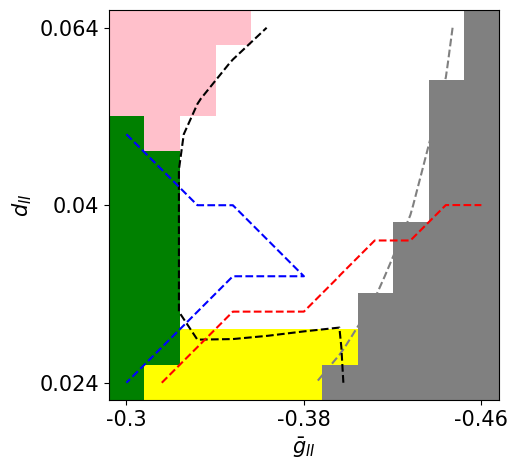

In [4]:
changed_params = ['d_II', 'g_bar_II']
changed_params_latex = [r'$d_{II}$', r'$\bar{g}_{II}$']
p_simul = Simul_Params(T = 100, t_step=100, record_step=10, activation_func=['thres_linear','thres_powerlaw'], external_input="DC_noise",tau_m=20)
plot_phase_diagram_new("try", changed_params, changed_params_latex, generate_params_phase_d_II_g_bar_II_try_L, p_simul, repeat_num=5)

c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


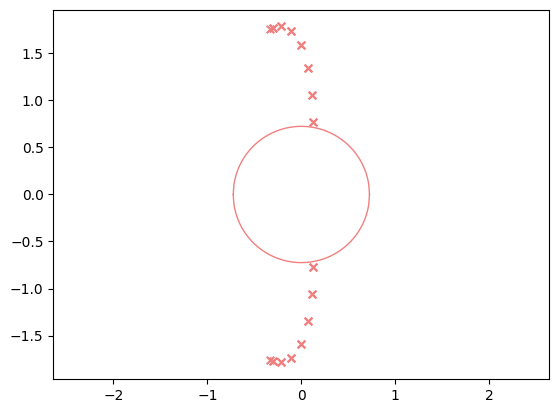

In [18]:
p_simul = Simul_Params(T = 2000, t_step=5, record_step=10, activation_func=['thres_linear','thres_powerlaw'], external_input="DC_noise",tau_m=20.0)
p_net = generate_params_phase_d_II_g_bar_II_thres_L(10,10)
p_net_eff = calc_eff_p_net(p_net,p_simul)
temp_plot_pred(p_net_eff)


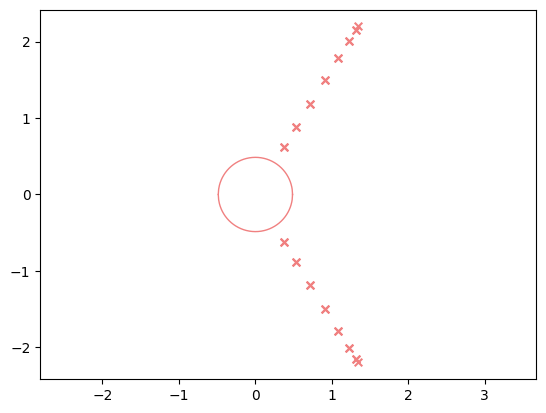

In [12]:
temp_plot_pred(p_net_eff)

c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[array([7.4130466 , 6.01763835])]


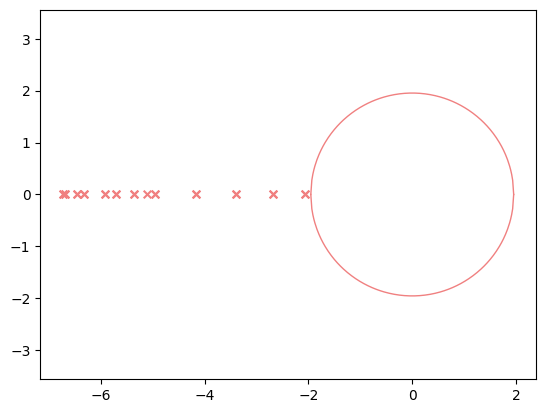

In [60]:
p_simul = Simul_Params(T = 50, t_step=100, record_step=10, activation_func=['thres_linear','thres_powerlaw'], external_input="DC_noise")
p_net = generate_params_phase_d_II_g_bar_II_try_L(0, 19)

fixed_points = find_dyn_fix_point(p_net, p_simul)
p_net_eff = calc_eff_p_net(p_net, p_simul)
fixed_points = sorted(fixed_points, key=lambda x: x[0])
print(fixed_points)
temp_plot_pred(p_net_eff)

In [ ]:
p_net = (0, 10)
record_x = dyn_simul(p_net, p_simul, dim=2, homo_fix_point=True)

NameError: name 'generate_params_phase_d_II_g_bar_II_try' is not defined

  0%|          | 15/10000 [00:01<15:38, 10.64it/s]


KeyboardInterrupt: 

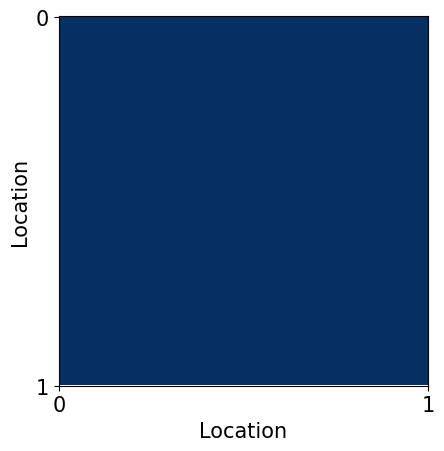

In [33]:
if type(p_simul.activation_func) == str:
    activation_func_list = [activation_func_dict[p_simul.activation_func], activation_func_dict[p_simul.activation_func]]
elif type(p_simul.activation_func) == list:
    activation_func_list = [activation_func_dict[p_simul.activation_func[0]], activation_func_dict[p_simul.activation_func[1]]]

activated_x_E = activation_func_list[0](record_x[:,0:p_net.N_E])
activated_x_I = activation_func_list[0](record_x[:,p_net.N_E:p_net.N_E+p_net.N_I])
record_x = np.concatenate((activated_x_E,activated_x_I),axis=1)

record_x = np.pad(record_x[:,0:p_net.N_E], ((0,0),(0,int(np.ceil(np.sqrt(p_net.N_E))**2 - p_net.N_E))))
record_x_img = record_x.reshape(np.shape(record_x)[0],int(np.ceil(np.sqrt(p_net.N_E))), int(np.ceil(np.sqrt(p_net.N_E))))


frames = []
scale_max = np.max(record_x)
for step in trange(np.shape(record_x)[0]):
    fig, ax = plt.subplots()
    
    norm = mcolors.TwoSlopeNorm(vmin=-scale_max, vcenter=0, vmax=scale_max)
        #img = ax.imshow(record_x[step][0:int(np.ceil(np.sqrt(p_net.N_E)))**2].reshape((int(np.ceil(np.sqrt(p_net.N_E))), int(np.ceil(np.sqrt(p_net.N_E))))), cmap=plt.cm.RdBu, norm=norm, origin='upper', aspect=1)
    img = ax.imshow(record_x_img[step,:,:], cmap=plt.cm.RdBu, norm=norm, origin='upper', aspect=1)

    ax.set_xlabel("Location", fontsize=15)
    ax.set_ylabel("Location", fontsize=15)
    # 设置 x 和 y 轴的刻度
    ticks = [0, int(np.ceil(np.sqrt(p_net.N_E)))]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    # 设置 x 和 y 轴的刻度标签
    ax.set_xticklabels([0, 1])
    ax.set_yticklabels([0, 1])
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    cb = fig.colorbar(img, ax=ax, extend='both')
    cb.locator = MaxNLocator(nbins=5)
    cb.update_ticks()
    
    # 保存当前帧
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(frame)
    
    # 关闭当前图表
    plt.close(fig)

# 将所有帧保存为一个GIF
imageio.mimsave("../../figs/try_wave_powerlaw.gif", frames, duration=0.05)

In [36]:
def generate_params_phase_d_II_g_bar_II_thres_L(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 40000, 10000
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 0, 0, 0, 0
    d_EE, d_IE, d_EI, d_II = 0.04, 0.04, 0.04, 0.04
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 1.1,0,0,0


    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    
    return p_net 

In [37]:
p_net = generate_params_phase_d_II_g_bar_II_thres_L(13,13)
p_simul = Simul_Params(T = 2000, t_step=5, record_step=10, activation_func=['tanh','tanh'], external_input="noise",tau_m=20.0)
find_dyn_fix_point(p_net, p_simul)

[array([0., 0.])]

In [38]:
find_dyn_fix_point_with_variance(p_net, p_simul)

c:\Users\huang-yh20\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[array([-2.73861763e-29, -6.73405141e-30,  1.59548425e-01,  1.00000000e-02])]